# TestCase 1

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config1.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 1
# version : 3
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [4]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [5]:
assert testcase == 1
check_config(config)

Config file is valid


## Imports + Load network

In [6]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

In [9]:
if version == 1:
    from testcases.networks.test_2D.test_1.test_1_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_1.test_1_v2 import Run_laplacian2D,Poisson_2D
elif version == 3:
    from testcases.networks.test_2D.test_1.test_1_v3 import Run_laplacian2D,Poisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase1
problem = TestCase1(version=version)

Using device: cpu
torch loaded; device is cpu


/home/u2/lecourtier/Article1/code
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe1_v3.pth
network loaded
Error  tensor([0.0068])


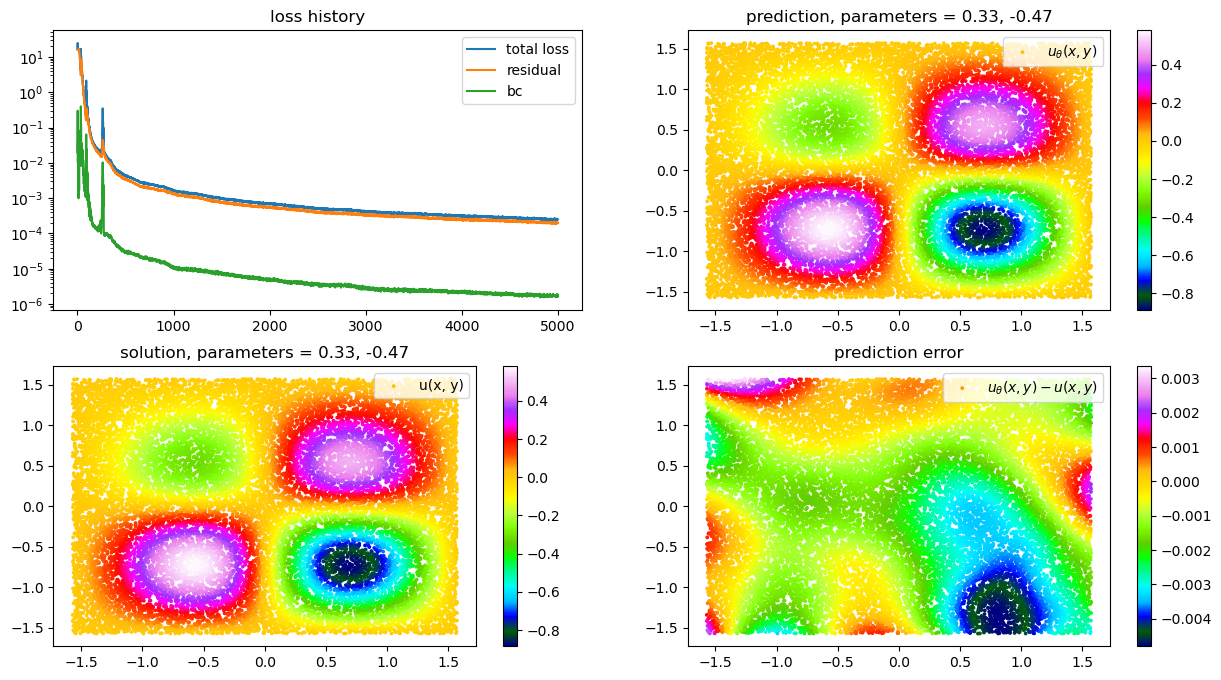

In [10]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [11]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [12]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/


### Run FEM

In [13]:
# degree = 1
# df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=True)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/FEM_case1_v3_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/FEM_case1_v3_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/FEM_case1_v3_param1_degree3.csv


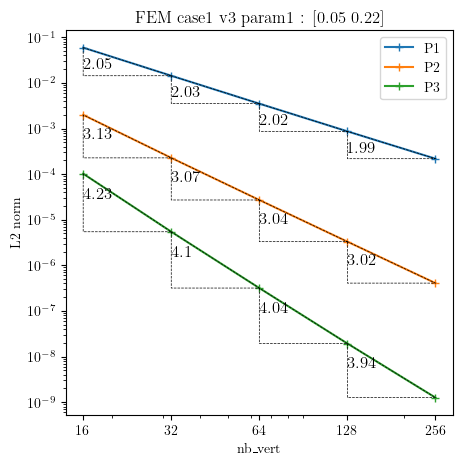

In [14]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [15]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/Corr_case1_v3_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/Corr_case1_v3_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/Corr_case1_v3_param1_degree3.csv


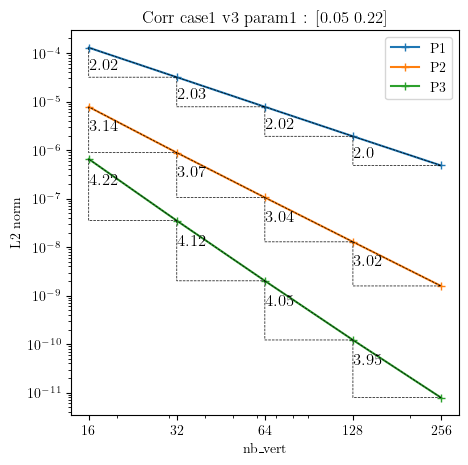

In [16]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

Convergence plots :

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/FEM_case1_v3_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/FEM_case1_v3_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param1/FEM_case1_v3_param1_degree3.csv


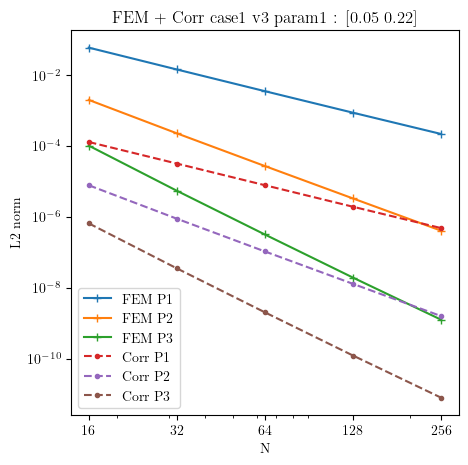

In [17]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [18]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

Reaching a given precision :

In [19]:
from modfenics.error_estimations.compare import CompareMethodsMeshSize,CompareMethodsDoFs
get_N = CompareMethodsMeshSize(error_estimations)
get_dofs = CompareMethodsDoFs(error_estimations)

In [20]:
get_N.save_tab_given_precisions_alldeg_allM()

In [21]:
get_dofs.save_tab_given_precisions_alldeg_allM(u_theta,tab_M=None)

## degree=1
# given_precision=0.001
V created with  119  vertices and degree  1  : h = 0.03765155032337691
V created with  6  vertices and degree  1  : h = 0.8885765876316732
# given_precision=0.0001
V created with  379  vertices and degree  1  : h = 0.011753658566557199
V created with  18  vertices and degree  1  : h = 0.26134605518578674
## degree=2
# given_precision=0.0001
V created with  42  vertices and degree  2  : h = 0.10836299849166771
V created with  7  vertices and degree  2  : h = 0.7404804896930615
# given_precision=1e-05
V created with  89  vertices and degree  2  : h = 0.05048730611543689
V created with  15  vertices and degree  2  : h = 0.31734878129702676
## degree=3
# given_precision=1e-05
V created with  28  vertices and degree  3  : h = 0.16455121993179198
V created with  8  vertices and degree  3  : h = 0.6346975625940523
# given_precision=1e-06
V created with  48  vertices and degree  3  : h = 0.09452942421613611
V created with  14  vertices and degree  3  : h = 0

## Gains

### Imports

In [22]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [23]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/


### Run FEM

In [24]:
# degree = 1
# df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

In [25]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree3.csv


### Run PINNs

In [37]:
# degree = 1
# df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

In [26]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/PINNs_errors_case1_v3_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/PINNs_errors_case1_v3_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/PINNs_errors_case1_v3_degree3.csv


### Run Add

In [39]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

In [27]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/Corr_errors_case1_v3_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/Corr_errors_case1_v3_degree2.csv
## Run errrors with Corr for degree=3
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  3  : h = 0.23383594411359887
V_theta created with  20  vertices and degree  10
0 The PINN is not trained with the exact boundary conditions
1 The PINN is not trained with the exact boundary conditions
2 The PINN is not trained with the exact boundary conditions
3 The PINN is not trained with the exact boundary conditions
4 The PINN is not trained with the exact boundary conditions
5 The PINN is not trained with the exact boundary conditions
6 The PINN is not trained with the exact boundary conditions
7 The PINN is not trained with the exact boundary conditio

### Compare methods

In [28]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv


In [29]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree3.csv


In [30]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv
method          PINNs                            FEM                       
type              min     max    mean    std     min     max    mean    std
method n_vert                                                              
Corr   20       25.12   63.61   41.80   8.43  113.56  525.65  390.21  88.05
       40      102.26  264.70  171.49  35.01  114.47  517.37  387.42  86.36


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


In [31]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv
method          PINNs                            FEM                       
type              min     max    mean    std     min     max    mean    std
method n_vert                                                              
Corr   20       25.12   63.61   41.80   8.43  113.56  525.65  390.21  88.05
       40      102.26  264.70  171.49  35.01  114.47  517.37  387.42  86.36


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree2.csv
method           PINNs                                 FEM                  \
type               min       max     mean      std     min     max    mean   
method n_vert                                                                
Corr   20       417.44   2309.24   915.76   320.91  108.71  289.13  214.07   
       40      3598.85  19903.46  7892.83  2763.74  108.79  288.44  214.25   

method                
type             std  
method n_vert         
Corr   20      40.09  
       40      39.96  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree3.csv
method             PINNs                                     FEM          \
type                 min        max       mean        std    min     max   
method n_vert                                                              
Corr   20        7057.61   43444.54   15270.67    5876.53  81.21  163.64   
       40      127922.98  791675.36  277841.39  107333.12  81.78  164.54   

method                        
type             mean    std  
method n_vert                 
Corr   20      140.13  19.28  
       40      140.92  19.56  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
